IMPORTING LIBRARIES 

In [2]:
#import seaborn and matplotlib and numpy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random 

LOADING THE DATASET

In [3]:
data=sns.load_dataset('tips')

Cheking out the data 

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Selecting features and normalizing values

<Axes: >

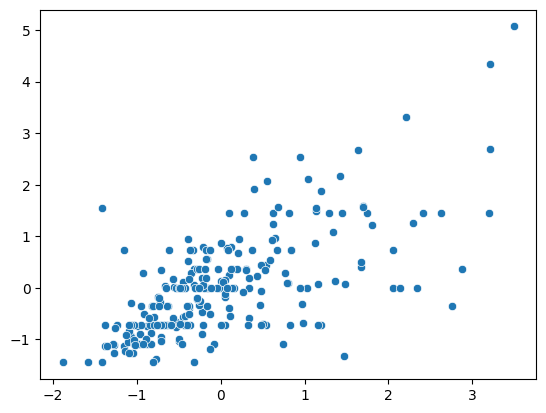

In [5]:
X=np.array(data['total_bill'])
Y=np.array(data['tip'])
#normalizing values of X and Y
X=(X - X.mean()) / X.std()
Y=(Y - Y.mean()) / Y.std()
sns.scatterplot(x=X,y=Y)

Writing some functions that show the prediction of Y and the cost function 

In [6]:
# predicts the values of Y for different X, for a given w and b
def predictY(w,b,X):
  Yp=np.dot(w,X)+b
  return Yp

#function that returns the cost of the model (in this case the mean squared error)
def cost(w,b,X,Y):
  Yp=predictY(w,b,X)
  mse=(1/len(Y))*(np.sum((Yp-Y)**2))
  return mse

Plotting the cost function in 3D

Text(0.5, 0.92, 'Surface Plot of MSE for Different Weights and Biases')

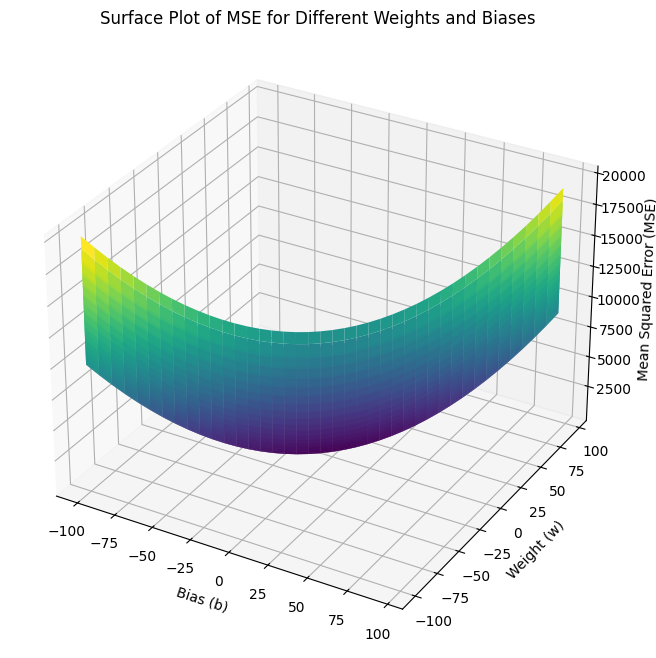

In [7]:
#find all the possible costs for all the possible weights and biases
W,B = np.arange(-100, 100, 5), np.arange(-100, 100, 5)
costs=[]
for i in W:
  for j in B:
    costs.append(cost(i,j,Y,X))

costs=np.array(costs)
#generating the surface plot
costs = costs.reshape(40,40)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B,W, costs, cmap='viridis')

# Configure plot aesthetics
ax.set_ylabel("Weight (w)")
ax.set_xlabel("Bias (b)")
ax.set_zlabel("Mean Squared Error (MSE)")
ax.set_title("Surface Plot of MSE for Different Weights and Biases")

In [8]:
# starting with a random wieght and bias
w = random.randrange(-100,100)
b= random.randrange(-100,100)
initcost=cost(w,b,X,Y)

learning_rate=0.01
epochs=500
costlist=[]
iterlist=[]
costlist.append(initcost)
iterlist.append((0,w,b))

print("Initial Weight:",w)
print("Initial Bias:",b)
print("Initial Cost:",initcost)

Initial Weight: -94
Initial Bias: -51
Initial Cost: 11565.038012531737


Final Weight: 0.6717708684871472
Final Bias: -0.0021349216759375426
Final Cost: 0.5434036788159241


<Axes: >

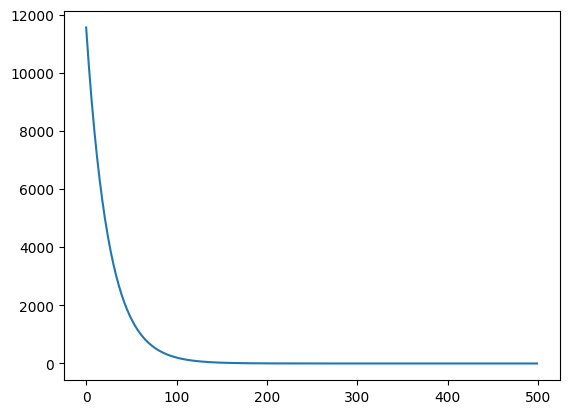

In [9]:
#single linear regression 
for i in range(1,epochs):
    yp=predictY(w,b,X)
    w=w-learning_rate*(1/len(X))*(np.dot((yp-Y),X)*2)
    b=b-learning_rate*(1/len(X))*(np.sum(yp-Y)*2)
    newcost=cost(w,b,X,Y)
    costlist.append(cost(w,b,X,Y))
    iterlist.append((i,w,b))

print("Final Weight:",w)
print("Final Bias:",b)
print("Final Cost:",cost(w,b,X,Y))

#plotting the cost function
sns.lineplot(x= (X[0] for X in iterlist),y=costlist)

OPTIMIZED VERSION

In [ ]:
#same as before
w = random.randrange(-100,100)
b= random.randrange(-100,100)
initcost=cost(w,b,X,Y)

print("Initial Weight:",w)
print("Initial Bias:",b)

learning_rate=0.01
epochs=500

costlist=[]
iterlist=[]

#using a precision of 8 decimal places.
costlist.append(round(initcost,8))
iterlist.append((0,w,b))

print(costlist)
print(iterlist)

In [ ]:
for i in range(1,epochs):
    yp=predictY(w,b,X)
    w=w-learning_rate*(1/len(X))*(np.dot((yp-Y),X)*2)
    b=b-learning_rate*(1/len(X))*(np.sum(yp-Y)*2)
    curr_cost=round(cost(w,b,X,Y),8)
    if curr_cost == costlist[-1]:    #if the cost is not changing, break the loop
      costlist.append(curr_cost)
      iterlist.append((i,w,b))
      break
    else:
      costlist.append(curr_cost)
      iterlist.append((i,w,b))  

print("Final Weight:",w)
print("Final Bias:",b)
print("Final Cost:",curr_cost)

#plotting the cost function
sns.lineplot(x= (X[0] for X in iterlist),y=costlist)